## Import and Format Data

The data folder is structured as below:

```
--data
    -- month_1
        -- data_file_for_day_1
        -- data_file_for_day_2
        .
        .
    -- month_2
        -- data_file_for_day_1
        -- data_file_for_day_2
        .
        .
    .
    .
    -- month_12
        -- data_file_for_day_1
        -- data_file_for_day_2
        .
        .
```

In this code, a separate dataframe is created for each month where the columns are height, temperature_of_day_1, temperature_of_day_2, and so and and the final column as average temperature for a height across all days of the month.

These dataframes for each month are stored inside the dictionary `month_dfs`, whose key is abbreviation for a month and value is the corresponding table (or dataframe) mentioned as above.

In [1]:
import numpy as np
import os
import pandas as pd

In [2]:
# if output folder does not exist, create it
directory = './output'
if not os.path.exists(directory):
    os.makedirs(directory)

In [3]:
data_dir = "./data" # path to data directory
month_dfs = {} # dictionary to store dataframe for each month

for month_dir in os.listdir(data_dir): # find all folders for each month
    month_dir_path = os.path.join(data_dir, month_dir) # get path to each month folder
    month_name = "".join([x for x in month_dir if not x.isdigit()]) # extract only the name of the month

    data_files = os.listdir(month_dir_path) # find all data files for a month
    data_files = sorted(data_files, key=lambda x: int(x[7:])) # sort data_files according to day
    
    for i, day_file in enumerate(data_files): 
        day_file_path = os.path.join(month_dir_path, day_file) # get path to each data file containing data for each day
        day = "".join([x for x in day_file if x.isdigit()]) # get the day number
        
        df = pd.read_csv(day_file_path, sep="  ", header=None,
                         names=['height', f'temperature_{day}']) # read the files, the files contain no header,
                                                                # thus the columns are given names manually, 
                                                                # It was found that there were two spaces between data of
                                                                # two columns thus sep was set to "  ".

        if i == 0:
            month_df = df
        else:
            month_df = pd.merge(month_df, df, on='height') # join the dataframes on basis of height

    # extract column names for temperatures
    month_df_columns = month_df.columns
    temperature_columns = [x for x in month_df_columns if 'temperature' in x]
    
    # get average temperature at a given height for the month
    month_df['avg_temperature'] = month_df[temperature_columns].mean(axis=1)
    
    month_dfs[month_name] = month_df # add the dataframe to the dictionary
        

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [4]:
month_dfs["sep"] # sample element of the dictionary

,height,temperature_1,temperature_2,temperature_3,temperature_4,temperature_5,temperature_6,temperature_7,temperature_8,temperature_9,...,temperature_23,temperature_24,temperature_25,temperature_26,temperature_27,temperature_28,temperature_29,temperature_30,temperature_31,avg_temperature
0,0.0,297.9,297.9,297.8,297.8,297.8,297.7,297.7,297.7,297.6,...,297.2,297.1,297.1,297.0,297.0,296.9,296.9,296.8,296.8,297.383871
1,0.5,295.8,295.7,295.7,295.7,295.7,295.6,295.6,295.6,295.6,...,295.1,295.1,295.0,295.0,295.0,294.9,294.9,294.8,294.8,295.319355
2,1.0,293.5,293.5,293.5,293.5,293.4,293.4,293.4,293.4,293.3,...,293.0,292.9,292.9,292.8,292.8,292.7,292.7,292.7,292.6,293.129032
3,1.5,291.2,291.2,291.1,291.1,291.1,291.1,291.1,291.0,291.0,...,290.6,290.6,290.5,290.5,290.5,290.4,290.4,290.3,290.3,290.796774
4,2.0,288.7,288.7,288.7,288.7,288.6,288.6,288.6,288.6,288.6,...,288.2,288.1,288.1,288.0,288.0,288.0,287.9,287.9,287.9,288.341935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,118.0,355.7,355.0,357.0,355.7,356.4,356.5,357.6,359.7,355.5,...,359.6,357.7,357.1,353.9,357.3,358.5,356.0,357.9,359.6,357.112903
237,118.5,360.4,359.5,361.8,360.4,361.2,361.3,362.6,365.0,360.3,...,365.0,362.9,362.2,358.6,362.5,363.9,361.0,363.2,365.1,362.132258
238,119.0,365.0,364.0,366.6,365.0,365.9,366.1,367.6,370.3,365.0,...,370.4,368.0,367.3,363.1,367.6,369.2,365.9,368.4,370.6,367.096774
239,119.5,369.6,368.6,371.4,369.7,370.7,370.9,372.5,375.6,369.6,...,375.8,373.1,372.3,367.7,372.6,374.5,370.9,373.6,376.1,372.054839


In [5]:
# sort the dictionary according to months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sorted_dfs = {}
for key in months:
    sorted_dfs[key] = month_dfs[key]

## Visualize Data

### Line Plot

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

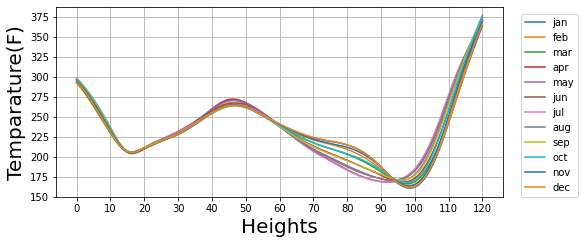

In [7]:
fig,ax = plt.subplots(1, figsize=(8,3.5))

for month, df in sorted_dfs.items():
    heights = df["height"].values
    avg_temp = df["avg_temperature"].values
    ax.plot(heights, avg_temp, label=month)
    
ax.set_xlabel("Heights", fontsize=20)
ax.set_ylabel("Temparature(F)", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot.pdf')
plt.show()

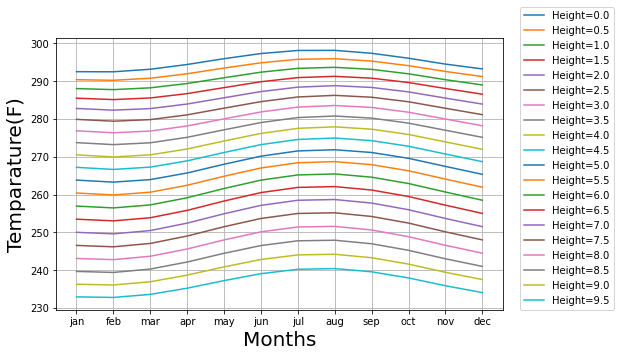

In [8]:
fig,ax = plt.subplots(1, figsize=(8,5))
months = list(sorted_dfs.keys())

heights = sorted_dfs['jan']['height'].values[:20]
for i, height in enumerate(heights):
    temps = []
    for month, df in sorted_dfs.items():
        avg_temp = df["avg_temperature"].values[i]
        temps.append(avg_temp)
    ax.plot(months, temps, label=f'Height={height}')
    
ax.set_xlabel("Months", fontsize=20)
ax.set_ylabel("Temparature(F)", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(1))
# ax.yaxis.set_major_locator(MultipleLocator())
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot.pdf')
plt.show()

In [9]:
layers = {
    "Troposphere": np.linspace(0, 9.5, 20),
    "Stratosphere": np.linspace(10, 29.5, 40),
    "Mesosphere": np.linspace(30, 49.5, 40),
    "Thermosphere (50 KM to 70 KM)": np.linspace(50, 69.5, 40),
    "Thermosphere (70 KM to 90 KM)": np.linspace(70, 89.5, 40),
    "Thermosphere (90 KM to 110 KM)": np.linspace(90, 109.5, 40),
    "Thermosphere (110 KM to 121 KM)": np.linspace(110, 121, 23),
    "Thermosphere": np.linspace(50, 121, 143),
}
layers


{'Troposphere': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
        6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5]),
 'Stratosphere': array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ,
        15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5,
        21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. ,
        26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5]),
 'Mesosphere': array([30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ,
        35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5,
        41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. , 45.5, 46. ,
        46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5]),
 'Thermosphere (50 KM to 70 KM)': array([50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. ,
        55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5,
        61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. ,
        66.5, 67. , 67.5, 68. , 68

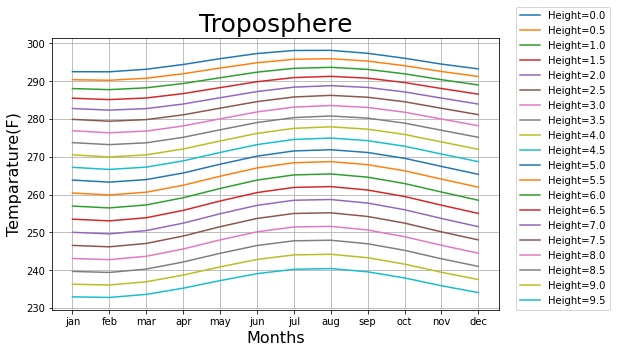

In [10]:

def plot_layer(layer, heights, fig_height):
    fig,ax = plt.subplots(1, figsize=(8,fig_height))
    months = list(sorted_dfs.keys())
    for i, height in enumerate(heights):
        temps = []
        for month, df in sorted_dfs.items():
            avg_temp = df["avg_temperature"].values[i]
            temps.append(avg_temp)
        ax.plot(months, temps, label=f'Height={height}')
    ax.set_title(layer, fontsize=25)
    ax.set_xlabel("Months", fontsize=16)
    ax.set_ylabel("Temparature(F)", fontsize=16)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    # ax.yaxis.set_major_locator(MultipleLocator())
    ax.grid()
    ax.legend(loc=(1.04,0))
    plt.savefig(f'./output/{layer}.pdf')
    
    
    
l = "Troposphere"
plot_layer(l, layers[l], 5)

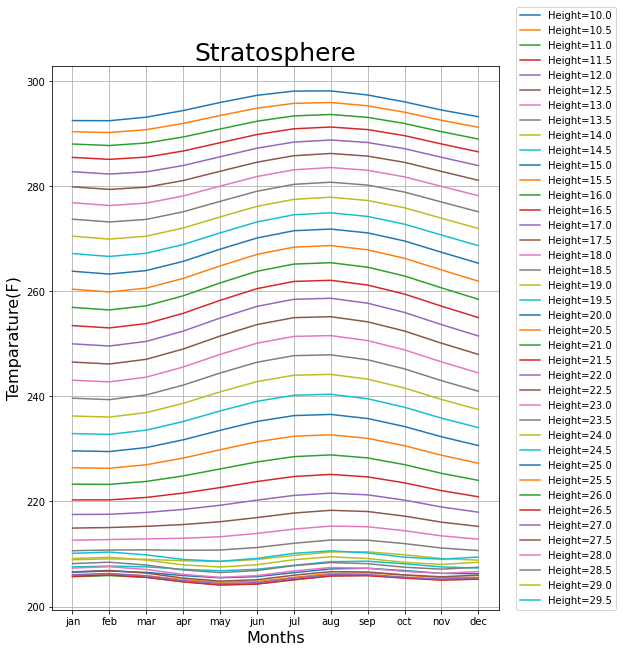

In [11]:
l = "Stratosphere"
plot_layer(l, layers[l], 10)

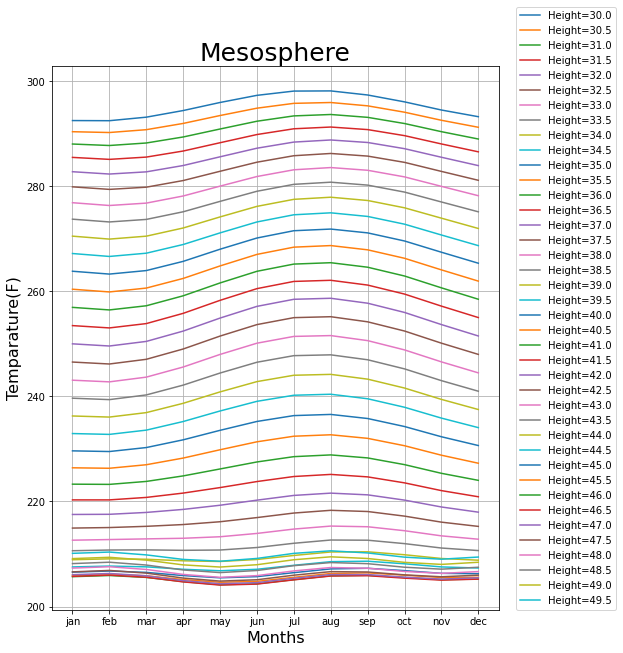

In [12]:
l = "Mesosphere"
plot_layer(l, layers[l], 10)

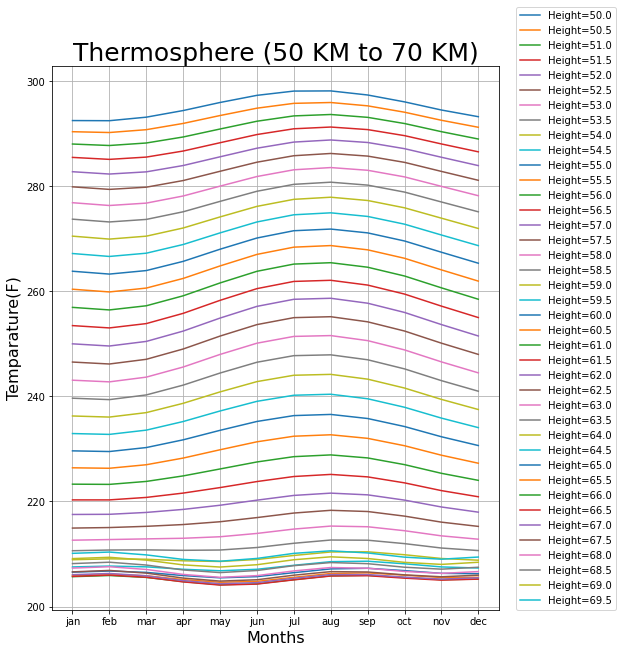

In [13]:
l = "Thermosphere (50 KM to 70 KM)"
plot_layer(l, layers[l], 10)

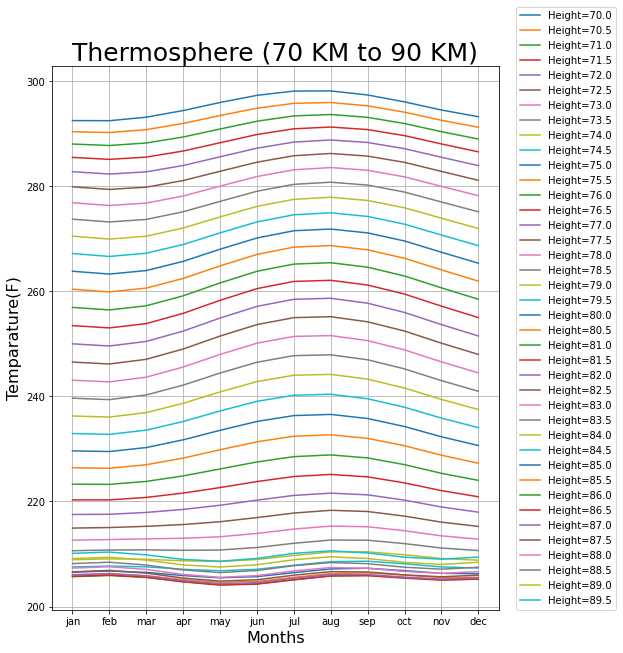

In [14]:
l = "Thermosphere (70 KM to 90 KM)"
plot_layer(l, layers[l], 10)

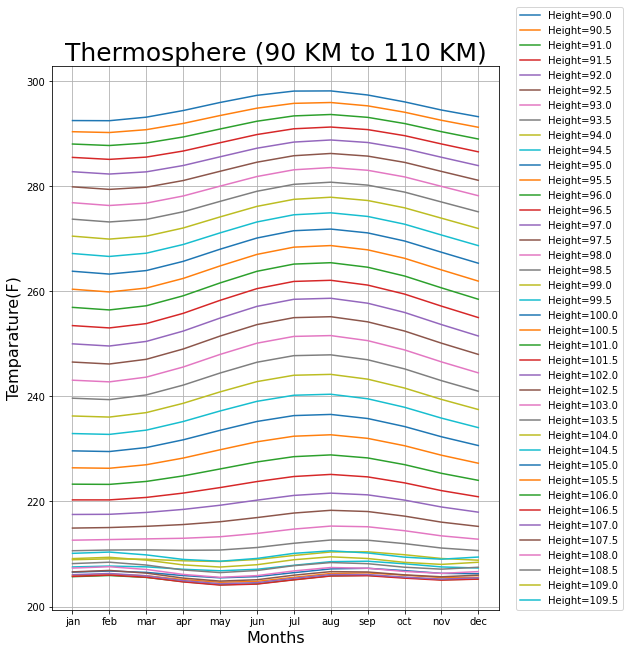

In [15]:
l = "Thermosphere (90 KM to 110 KM)"
plot_layer(l, layers[l], 10)

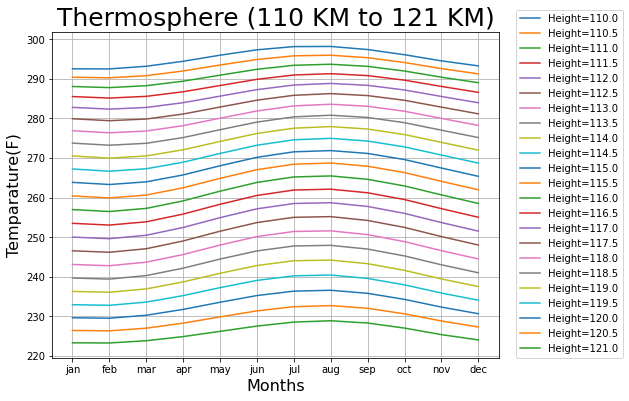

In [16]:
l = "Thermosphere (110 KM to 121 KM)"
plot_layer(l, layers[l], 6)

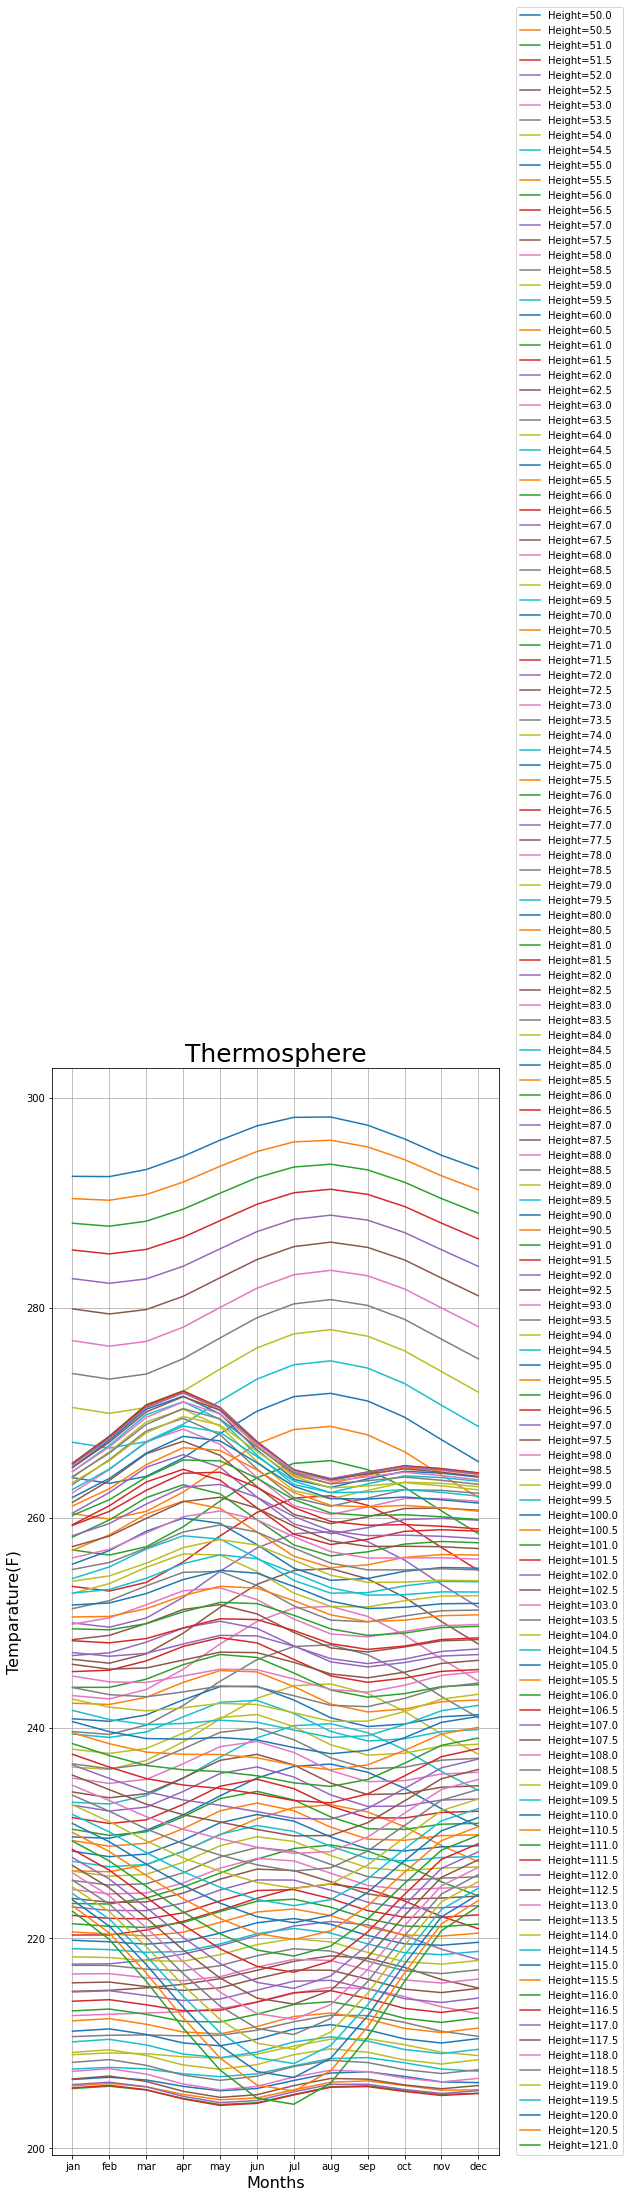

In [17]:
l = "Thermosphere"
plot_layer(l, layers[l], 20)

### Contour Plot

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, -20.0, '-10.0'),
 Text(0, 0.0, '0.0'),
 Text(0, 20.0, '10.0'),
 Text(0, 40.0, '20.0'),
 Text(0, 60.0, '30.0'),
 Text(0, 80.0, '40.0'),
 Text(0, 100.0, '50.0'),
 Text(0, 120.0, '60.0'),
 Text(0, 140.0, '70.0'),
 Text(0, 160.0, '80.0'),
 Text(0, 180.0, '90.0'),
 Text(0, 200.0, '100.0'),
 Text(0, 220.0, '110.0'),
 Text(0, 240.0, '120.0'),
 Text(0, 260.0, '')]

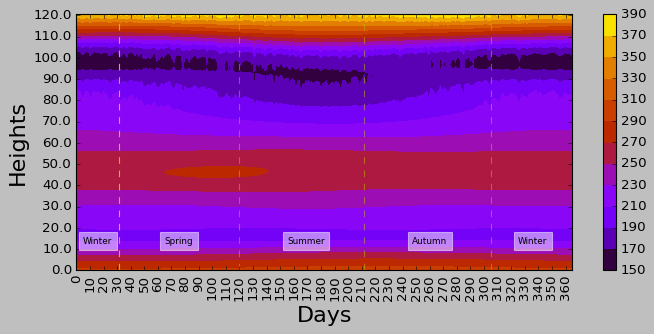

In [29]:
# get values for heights
heights = sorted_dfs['jan']['height'].values

# create a dataframe which contains temperature values for all 365 days,
# columns represent temperature for each heights and rows contain temperatures for each day
all_dfs = [val.drop(['avg_temperature','height'], 1).T for key, val in sorted_dfs.items()] # remove height and avg_temperature
                                                                                        # column and transpose each dataframes to
#                                                                                     # keep heights as columns and temperature of
                                                                                    # each day in a row
final_df = pd.concat(all_dfs) # merge all the transposed dataframes
final_df.to_csv('./output/final.csv')

# get the dataframe values as numpy matrix
all_data = final_df.to_numpy()
contour_data = all_data.T # transpose the data to plot days in x-axis of contour plot

contour_data= np.vstack((contour_data,contour_data[0])) # done from example code from rejina.ipynb, why????

plt.style.use('classic') # style from rejina.ipynb
fig,ax = plt.subplots(1, figsize=(10,4))
gap = 20
levels = np.arange(150,391,gap) # set levels of temperature at which to draw contours and label colorbar
cs = ax.contourf(contour_data, levels=levels, cmap='gnuplot') # style from rejina.ipynb
cbar = fig.colorbar(cs)
cbar.set_ticks(levels) # set labels in the colorbar

# Uncomment this section if you want fine lines for contour levels
# cnt = ax.contour(contour_data, levels=levels, colors='k') # colors from rejina.ipynb, to draw contour lines
# for c in cnt.collections:
#     c.set_linewidth(0.5) # change this value to change width of contour lines


# uncomment following to set dashed lines like grid, change the ranges as per need
# ax.hlines(range(0,241, 50),0,365,linestyle='--')
# ax.vlines(range(0,365, 25),0,241,linestyle='--')

# These are the new codes added on June 14, 2020
a1=0.5
h = 25
ax.axvline(x=31, color='y', linestyle='--', alpha=1)
ax.axvline(x=120, color='y', linestyle='--', alpha=0.5)
ax.axvline(x=212, color='y', linestyle='--', alpha=0.5)
ax.axvline(x=305, color='y', linestyle='--', alpha=0.5)

# Comment following if you don't want the text.
t1 = ax.text(5, h, 'Winter', fontsize=8)
t2 = ax.text(65, h, 'Spring', fontsize=8)
t3 = ax.text(155, h, 'Summer', fontsize=8)
t4 = ax.text(247, h, 'Autumn', fontsize=8)
t5 = ax.text(325, h, 'Winter', fontsize=8)
t1.set_bbox(dict(facecolor='white', alpha=a1, edgecolor='white')) # set white transparent background for text
t2.set_bbox(dict(facecolor='white', alpha=a1, edgecolor='white'))
t3.set_bbox(dict(facecolor='white', alpha=a1, edgecolor='white'))
t4.set_bbox(dict(facecolor='white', alpha=a1, edgecolor='white'))
t5.set_bbox(dict(facecolor='white', alpha=a1, edgecolor='white'))

ax.set_xlabel("Days", fontsize=20)
ax.set_ylabel("Heights", fontsize=20)

ax.xaxis.set_major_locator(MultipleLocator(10)) # put ticks in x-axis for every 10 points
ax.set_xticklabels(ax.get_xticks().astype(int), rotation = 90) # set labels in x-axis

# todo: write understandable code segment for following
ax.yaxis.set_major_locator(MultipleLocator(20)) # put ticks in y-axis for every 20 points
ax.set_yticklabels(np.arange(heights[0]-10, heights[-1]+1, 10)) # set labels in y-axis


### Scatter Plot

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(-10.0, 0, '-10'),
 Text(0.0, 0, '0'),
 Text(10.0, 0, '10'),
 Text(20.0, 0, '20'),
 Text(30.0, 0, '30'),
 Text(40.0, 0, '40'),
 Text(50.0, 0, '50'),
 Text(60.0, 0, '60'),
 Text(70.0, 0, '70'),
 Text(80.0, 0, '80'),
 Text(90.0, 0, '90'),
 Text(100.0, 0, '100'),
 Text(110.0, 0, '110'),
 Text(120.0, 0, '120'),
 Text(130.0, 0, '130'),
 Text(140.0, 0, '140'),
 Text(150.0, 0, '150'),
 Text(160.0, 0, '160'),
 Text(170.0, 0, '170'),
 Text(180.0, 0, '180'),
 Text(190.0, 0, '190'),
 Text(200.0, 0, '200'),
 Text(210.0, 0, '210'),
 Text(220.0, 0, '220'),
 Text(230.0, 0, '230'),
 Text(240.0, 0, '240'),
 Text(250.0, 0, '250'),
 Text(260.0, 0, '260'),
 Text(270.0, 0, '270'),
 Text(280.0, 0, '280'),
 Text(290.0, 0, '290'),
 Text(300.0, 0, '300'),
 Text(310.0, 0, '310'),
 Text(320.0, 0, '320'),
 Text(330.0, 0, '330'),
 Text(340.0, 0, '340'),
 Text(350.0, 0, '350'),
 Text(360.0, 0, '360'),
 Text(370.0, 0, '370'),
 Text(380.0, 0, '380')]

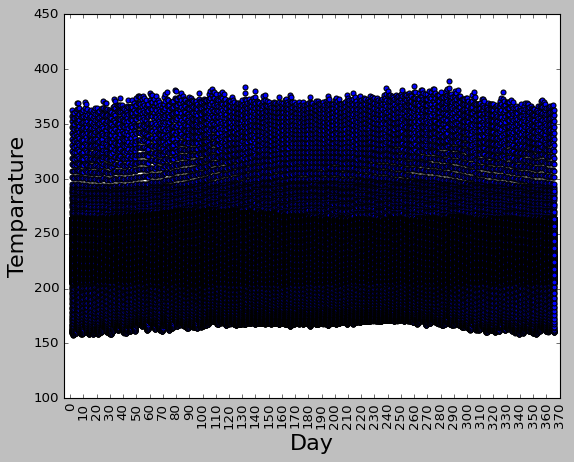

In [19]:
fig,ax = plt.subplots(1, figsize=(8,6))
day_cnt = 0
for month, df in sorted_dfs.items():
    cols = df.columns
    temp_cols = [x for x in cols if x.startswith('temperature')]
    for temp_col in temp_cols:
        temp = df[temp_col].values
        # day = int("".join([x for x in temp_col if x.isdigit()]))
        day_cnt += 1
        day_arr = np.ones_like(temp) * day_cnt
        ax.scatter(day_arr, temp)

ax.set_xlabel("Day", fontsize=20)
ax.set_ylabel("Temparature", fontsize=20)

ax.set_xlim(-5,370)

ax.xaxis.set_major_locator(MultipleLocator(10)) # put ticks in x-axis for every 10 points
ax.set_xticklabels(ax.get_xticks().astype(int), rotation = 90)

In [20]:
day_cnt

366

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(-10.0, 0, '-10'),
 Text(0.0, 0, '0'),
 Text(10.0, 0, '10'),
 Text(20.0, 0, '20'),
 Text(30.0, 0, '30'),
 Text(40.0, 0, '40'),
 Text(50.0, 0, '50'),
 Text(60.0, 0, '60'),
 Text(70.0, 0, '70'),
 Text(80.0, 0, '80'),
 Text(90.0, 0, '90'),
 Text(100.0, 0, '100'),
 Text(110.0, 0, '110'),
 Text(120.0, 0, '120'),
 Text(130.0, 0, '130'),
 Text(140.0, 0, '140'),
 Text(150.0, 0, '150'),
 Text(160.0, 0, '160'),
 Text(170.0, 0, '170'),
 Text(180.0, 0, '180'),
 Text(190.0, 0, '190'),
 Text(200.0, 0, '200'),
 Text(210.0, 0, '210'),
 Text(220.0, 0, '220'),
 Text(230.0, 0, '230'),
 Text(240.0, 0, '240'),
 Text(250.0, 0, '250'),
 Text(260.0, 0, '260'),
 Text(270.0, 0, '270'),
 Text(280.0, 0, '280'),
 Text(290.0, 0, '290'),
 Text(300.0, 0, '300'),
 Text(310.0, 0, '310'),
 Text(320.0, 0, '320'),
 Text(330.0, 0, '330'),
 Text(340.0, 0, '340'),
 Text(350.0, 0, '350'),
 Text(360.0, 0, '360'),
 Text(370.0, 0, '370'),
 Text(380.0, 0, '380')]

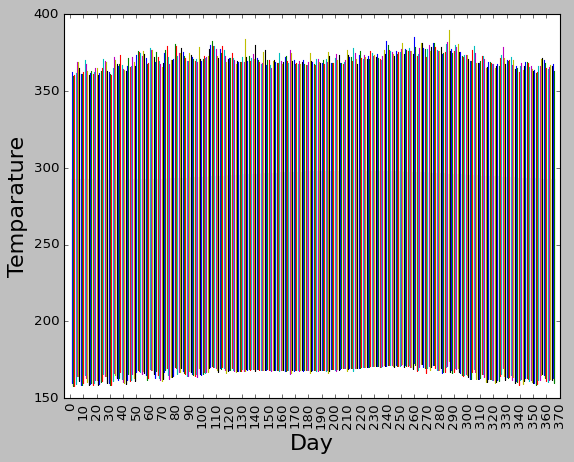

In [21]:
fig,ax = plt.subplots(1, figsize=(8,6))
day_cnt = 0
for month, df in sorted_dfs.items():
    cols = df.columns
    temp_cols = [x for x in cols if x.startswith('temperature')]
    for temp_col in temp_cols:
        temp = df[temp_col].values
        # day = int("".join([x for x in temp_col if x.isdigit()]))
        day_cnt += 1
        day_arr = np.ones_like(temp) * day_cnt
        ax.plot(day_arr, temp)

ax.set_xlabel("Day", fontsize=20)
ax.set_ylabel("Temparature", fontsize=20)

ax.set_xlim(-5,370)

ax.xaxis.set_major_locator(MultipleLocator(10)) # put ticks in x-axis for every 10 points
ax.set_xticklabels(ax.get_xticks().astype(int), rotation = 90)

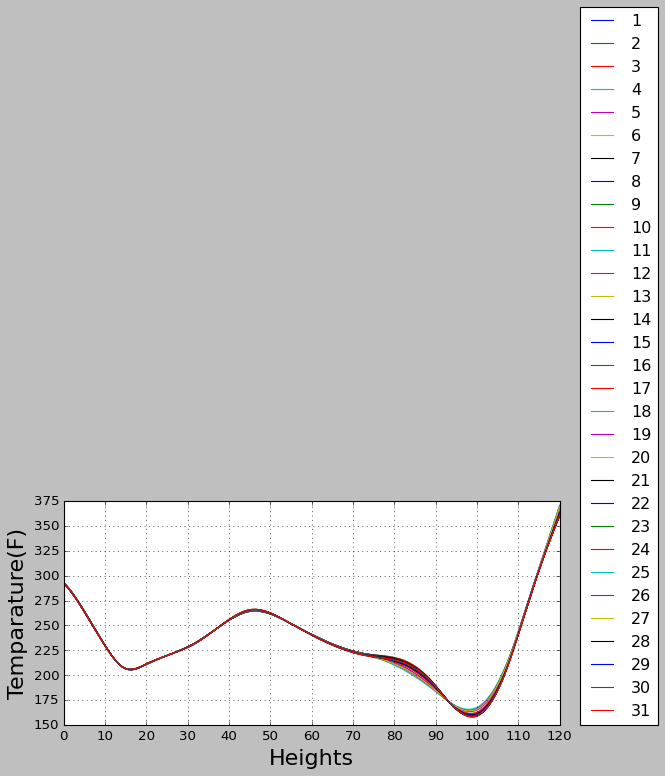

In [22]:
fig,ax = plt.subplots(1, figsize=(8,3.5))

df = sorted_dfs['jan']

heights = df["height"].values
temp_cols = [x for x in cols if x.startswith('temperature')]
for temp_col in temp_cols:
    temp = df[temp_col].values
    day = "".join([x for x in temp_col if x.isdigit()])
    # day_arr = np.ones_like(temp) * day_cnt
    ax.plot(heights, temp, label=day)
    
ax.set_xlabel("Heights", fontsize=20)
ax.set_ylabel("Temparature(F)", fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(25))
ax.grid()
plt.legend(loc=(1.04,0))
plt.savefig('./output/month_wise_line_plot.pdf')
plt.show()

/home/lenovo/miniconda3/envs/manisha/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


[Text(-10.0, 0, '-10'),
 Text(0.0, 0, '0'),
 Text(10.0, 0, '10'),
 Text(20.0, 0, '20'),
 Text(30.0, 0, '30'),
 Text(40.0, 0, '40'),
 Text(50.0, 0, '50'),
 Text(60.0, 0, '60'),
 Text(70.0, 0, '70'),
 Text(80.0, 0, '80'),
 Text(90.0, 0, '90'),
 Text(100.0, 0, '100'),
 Text(110.0, 0, '110'),
 Text(120.0, 0, '120'),
 Text(130.0, 0, '130'),
 Text(140.0, 0, '140')]

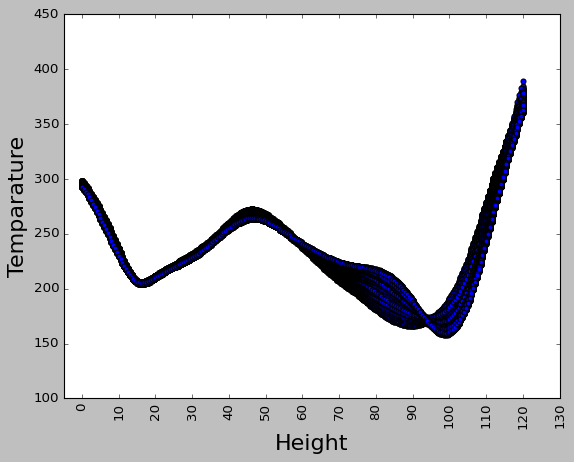

In [23]:
fig,ax = plt.subplots(1, figsize=(8,6))
for month, df in sorted_dfs.items():
    cols = df.columns
    temp_cols = [x for x in cols if x.startswith('temperature')]
    height = df['height'].values
    for temp_col in temp_cols:
        temp = df[temp_col].values
        ax.scatter(height, temp)

ax.set_xlabel("Height", fontsize=20)
ax.set_ylabel("Temparature", fontsize=20)

ax.set_xlim(-5,130)

ax.xaxis.set_major_locator(MultipleLocator(10)) # put ticks in x-axis for every 10 points
ax.set_xticklabels(ax.get_xticks().astype(int), rotation = 90)

### Contour Plot Seasonal

In [24]:
spring = ['mar', 'apr', 'may']
summer = ['jun', 'jul', 'aug']
autumn = ['sep', 'oct', 'nov']
winter = ['dec', 'jan', 'feb']
